In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score

In [2]:
df=pd.read_csv('StudentPerformance.csv')

In [3]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [4]:
df.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [5]:
df.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [7]:
df.nunique()

Hours Studied                        9
Previous Scores                     60
Extracurricular Activities           2
Sleep Hours                          6
Sample Question Papers Practiced    10
Performance Index                   91
dtype: int64

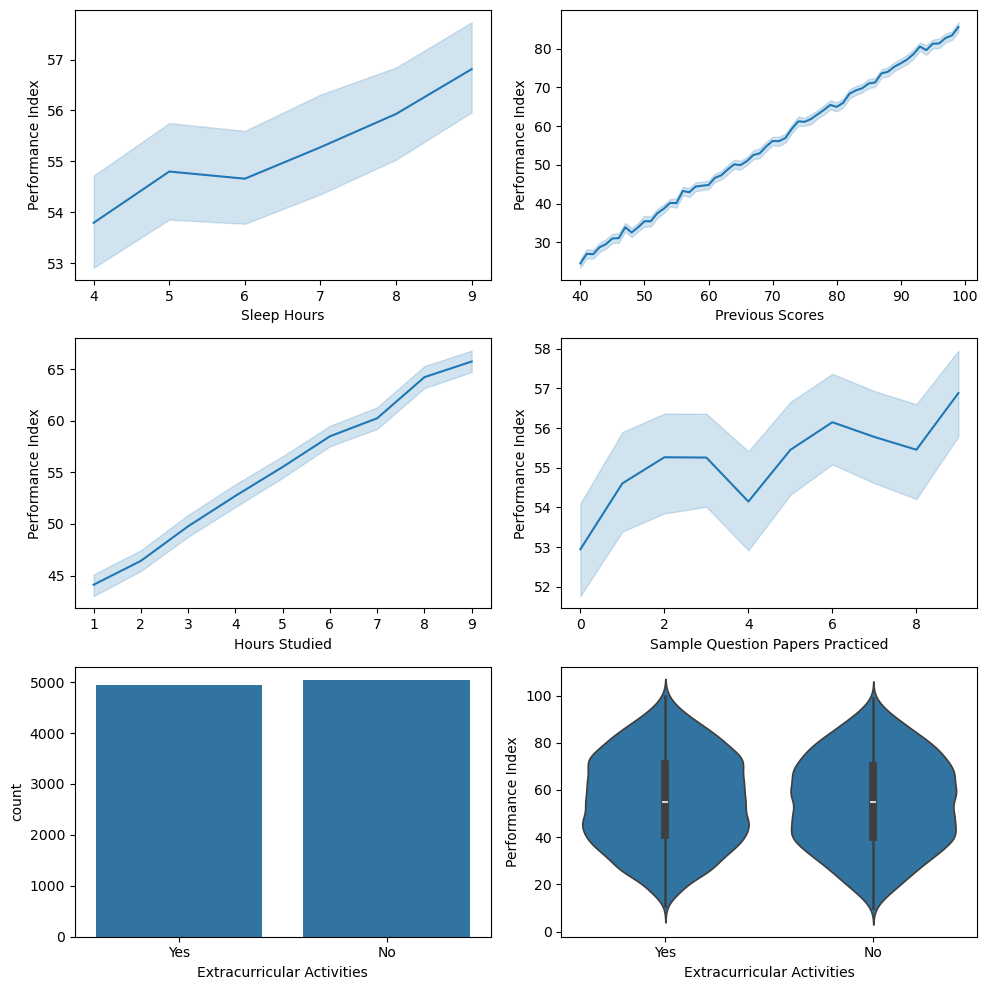

In [8]:
fig,axs=plt.subplots(3,2, figsize=(10,10))

sns.lineplot(x='Sleep Hours',y='Performance Index',data=df,ax=axs[0,0])
sns.lineplot(x='Previous Scores',y='Performance Index',data=df,ax=axs[0,1])
sns.lineplot(x='Hours Studied',y='Performance Index',data=df,ax=axs[1,0])
sns.lineplot(x='Sample Question Papers Practiced',y='Performance Index',data=df,ax=axs[1,1])
sns.countplot(x='Extracurricular Activities',data=df,ax=axs[2,0])
sns.violinplot(y='Performance Index',x='Extracurricular Activities',data=df,ax=axs[2,1])

plt.tight_layout()
plt.show()


In [9]:
X=df.iloc[:,:-1]
Y=df.iloc[:,-1]

In [10]:
num_feature=X.select_dtypes(exclude='object').columns
cat_feature=X.select_dtypes(include='object').columns

num_tranformer=StandardScaler()
cat_transformer=OneHotEncoder()

preprocessor=ColumnTransformer([
    ('num',num_tranformer,num_feature),
    ('cat',cat_transformer,cat_feature)
])


In [11]:
X_train,X_test,Y_train,Y_test= train_test_split(
    X,Y,test_size=0.2,random_state=42)

In [12]:
X_train_processed=preprocessor.fit_transform(X_train)
X_test_processed=preprocessor.transform(X_test)

In [13]:
model=LinearRegression()


In [14]:
model.fit(X_train_processed,Y_train)

LinearRegression()

In [15]:
y_pred=model.predict(X_test_processed)
score=r2_score(Y_test,y_pred)
score

0.9889832909573145